### **Read data**

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

data_root = './dataset'
data_path = os.path.join(data_root, 'churn_data_clean.csv')

df = pd.read_csv(data_path)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [4]:
df.shape

(10348, 27)

### **Split Data**
Split data into training, validation, testing set with ratio 7:1:2

In [5]:
X = df.loc[:, df.columns != 'Churn'] # Features
y = df.loc[:, df.columns == 'Churn'] # Target
print(X.shape)
print(y.shape)

(10348, 26)
(10348, 1)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

print('Training set: ', y_train.shape)
print('Validation set: ', y_val.shape)
print('Testing set: ', y_test.shape)

Training set:  (7243, 1)
Validation set:  (1035, 1)
Testing set:  (2070, 1)


In [7]:
X_train.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1939,1,0,0,1,1,1,0,0,0,0,0,0,0,1,21.050000,21.050000,0,0,1,1,0,0,0,0,0,1
2497,0,0,1,0,4,1,0,0,0,0,0,0,0,0,19.600000,93.450000,0,0,1,1,0,0,0,0,0,1
5222,0,0,0,0,8,1,1,1,1,1,0,0,0,1,65.500000,573.150000,1,0,0,1,0,0,1,0,0,0
7482,1,0,0,0,3,1,0,0,0,0,0,0,0,1,70.067047,233.635071,0,1,0,1,0,0,0,0,1,0
229,0,0,1,1,47,1,1,1,1,0,1,1,1,1,85.300000,4107.250000,1,0,0,0,0,1,0,1,0,0
4876,1,0,0,0,10,1,0,1,1,1,0,1,1,1,104.400000,1081.450000,0,1,0,1,0,0,0,0,1,0
2914,1,0,0,0,32,1,0,0,0,0,0,1,1,1,64.850000,2010.950000,1,0,0,0,1,0,1,0,0,0
68,0,0,1,1,50,1,0,0,0,0,0,0,0,0,20.150000,930.900000,0,0,1,0,0,1,1,0,0,0
7832,1,0,1,0,66,1,1,0,1,1,1,1,1,1,106.060504,7139.740286,0,1,0,0,1,0,0,0,1,0
7494,0,1,0,0,52,1,1,0,1,0,0,1,0,1,83.370580,4349.291005,0,1,0,1,0,0,0,0,1,0


In [8]:
X_val.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5853,1,0,1,0,62,1,1,1,1,0,0,0,1,0,96.100000,6001.450000,0,1,0,0,1,0,0,0,1,0
4882,0,0,0,0,66,0,0,1,1,1,1,1,1,1,62.500000,4136.400000,1,0,0,0,0,1,1,0,0,0
2414,0,0,1,0,25,1,0,0,0,0,0,0,0,1,20.200000,507.900000,0,0,1,0,1,0,1,0,0,0
5642,0,0,0,0,20,1,0,0,0,0,0,0,0,0,19.500000,403.150000,0,0,1,0,1,0,0,0,0,1
8623,1,0,0,0,2,1,0,0,0,0,0,0,0,1,44.767381,94.317657,1,0,0,1,0,0,0,0,1,0
1128,1,0,0,0,27,1,0,0,0,0,0,0,0,1,19.400000,529.800000,0,0,1,1,0,0,0,0,1,0
6990,1,0,1,0,36,1,0,1,0,0,0,1,1,1,93.600000,3366.050000,0,1,0,1,0,0,0,0,1,0
4849,1,0,0,0,41,0,0,0,0,1,0,1,1,1,51.350000,2075.100000,1,0,0,0,1,0,0,0,1,0
5744,1,1,1,0,40,1,0,0,0,0,0,0,1,0,55.800000,2283.300000,1,0,0,0,1,0,0,0,1,0
9067,1,0,0,0,55,1,0,1,1,0,0,0,0,1,40.541898,2106.960062,1,0,0,1,0,0,0,0,1,0


In [9]:
X_test.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
9428,1,0,0,0,47,1,1,0,0,1,0,1,1,1,93.853385,4506.133022,0,1,0,1,0,0,0,0,1,0
4593,0,0,0,0,11,1,0,0,0,0,0,0,0,0,20.300000,246.300000,0,0,1,1,0,0,1,0,0,0
5379,0,0,1,0,56,1,1,1,0,0,0,1,1,1,98.000000,5270.600000,0,1,0,0,1,0,0,0,1,0
8918,1,0,0,0,8,1,0,0,0,0,0,0,0,1,74.938341,631.572940,0,1,0,1,0,0,0,0,1,0
6448,1,0,0,0,58,1,1,0,0,1,1,1,1,1,104.650000,6219.600000,0,1,0,0,1,0,0,0,1,0
6060,0,1,0,0,8,1,0,0,1,0,0,1,0,1,87.100000,713.600000,0,1,0,1,0,0,0,0,1,0
850,0,0,1,1,72,1,1,1,1,1,1,1,1,1,115.800000,8476.500000,0,1,0,0,0,1,1,0,0,0
713,0,0,0,1,14,1,1,1,0,0,1,0,0,1,86.000000,1164.050000,0,1,0,1,0,0,0,0,0,1
8661,1,0,0,0,3,0,0,0,0,0,0,0,0,0,27.602254,74.301170,1,0,0,1,0,0,0,0,1,0
4438,1,0,1,1,51,1,1,0,0,0,0,0,0,1,24.950000,1222.250000,0,0,1,0,0,1,0,0,0,1


### **Normalization**

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

### **RF-AdaBoost**

In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

rf_classifier = RandomForestClassifier(random_state=42)

rf_ada = AdaBoostClassifier(estimator=rf_classifier, random_state=42)

# Measure the training time of the model
t0 = time.time()

rf_ada.fit(X_train, y_train.values.ravel())

print(f'Training time: {(time.time()-t0):.2f} s')

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training time: 53.02 s


Accuracy: 0.8329
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       524
           1       0.81      0.86      0.84       511

    accuracy                           0.83      1035
   macro avg       0.83      0.83      0.83      1035
weighted avg       0.83      0.83      0.83      1035



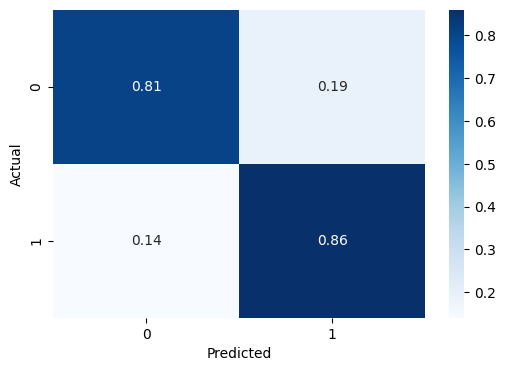

In [12]:
y_val_ada_pred = rf_ada.predict(X_val)
accuracy = accuracy_score(y_val, y_val_ada_pred)

print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_val, y_val_ada_pred))
ada_confmat = confusion_matrix(y_val, y_val_ada_pred, normalize='true')

plt.figure(figsize=(6,4))
sns.heatmap(ada_confmat,annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [14]:
rf_ada.get_params()

{'algorithm': 'SAMME.R',
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 42,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(random_state=42),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

#### *Hyper-parameters Tuning RF*

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion' : ['gini', 'entropy'], 
                'n_estimators': [25, 50, 100, 150], 
                'max_features': ['sqrt', 'log2', None], 
                'max_depth': [3, 6, 9], 
                'max_leaf_nodes': [3, 6, 9]}
rf_grid = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', verbose=3)
rf_grid.fit(X_train,y_train.values.ravel())

# print best parameter after tuning 
print(rf_grid.best_params_) 

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.772 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.783 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.779 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.788 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.772 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.783 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.778 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3

In [16]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=150, random_state=42)

In [17]:
rf_grid.best_score_

0.8072619142941025

#### **Tuned RF-AdaBoost**

In [18]:
best_criterion = rf_grid.best_params_.get('criterion')
best_max_features = rf_grid.best_params_.get('max_features')
best_n = rf_grid.best_params_.get('n_estimators')
best_max_depth = rf_grid.best_params_.get('max_depth')
best_max_leaf_nodes = rf_grid.best_params_.get('max_leaf_nodes')

# Use Hyper-parameter tuned RF as base estimator
rf_tune = RandomForestClassifier(n_estimators=best_n, 
                                 max_leaf_nodes=best_max_leaf_nodes, 
                                 max_depth=best_max_depth,
                                 criterion=best_criterion,
                                 max_features=best_max_features,
                                 random_state=42)

rf_ada_tune = AdaBoostClassifier(estimator=rf_tune, random_state=42)

# Measure the training time of the model
t0 = time.time()

rf_ada_tune.fit(X_train, y_train.values.ravel())

print(f'Training time: {time.time()-t0:.2f} s')

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training time: 26.93 s


Accuracy: 0.8377
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       524
           1       0.82      0.86      0.84       511

    accuracy                           0.84      1035
   macro avg       0.84      0.84      0.84      1035
weighted avg       0.84      0.84      0.84      1035



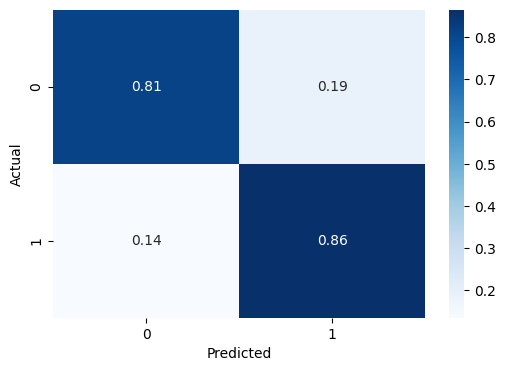

In [19]:
y_val_rf_ada_tune_pred = rf_ada_tune.predict(X_val)
accuracy_tune = accuracy_score(y_val, y_val_rf_ada_tune_pred)

print(f'Accuracy: {accuracy_tune:.4f}')

print('Classification Report:')
print(classification_report(y_val, y_val_rf_ada_tune_pred))
rf_ada_tune_confmat = confusion_matrix(y_val, y_val_rf_ada_tune_pred, normalize='true')

plt.figure(figsize=(6,4))
sns.heatmap(rf_ada_tune_confmat,annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **PCA**
Choose the number of components for which the cumulative explained variance exceeds a threshold of 0.95 (95%).

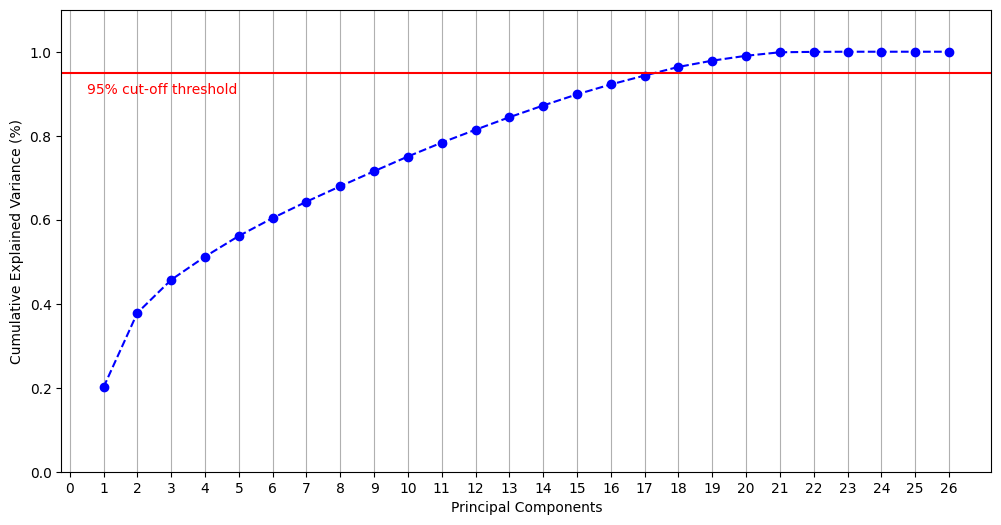

In [20]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA().fit(X_train_normalized)

plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 27, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Principal Components')
plt.xticks(np.arange(0, 27, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative Explained Variance (%)')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.9, '95% cut-off threshold', color = 'red')

ax.grid(axis='x')
plt.show()

In [21]:
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(X_train_normalized)
X_train_pca = pca.transform(X_train_normalized)
X_val_pca = pca.transform(X_val_normalized)
X_test_pca = pca.transform(X_test_normalized)

### **RF AdaBoost with PCA**

In [22]:
rf_ada_pca = AdaBoostClassifier(estimator=rf_classifier, random_state=42)

# Measure the training time of the model
t0 = time.time()

rf_ada_pca.fit(X_train_pca, y_train.values.ravel())

print(f'Training time: {time.time()-t0:.2f} s')

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training time: 199.52 s


Accuracy: 0.8077
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       524
           1       0.80      0.82      0.81       511

    accuracy                           0.81      1035
   macro avg       0.81      0.81      0.81      1035
weighted avg       0.81      0.81      0.81      1035



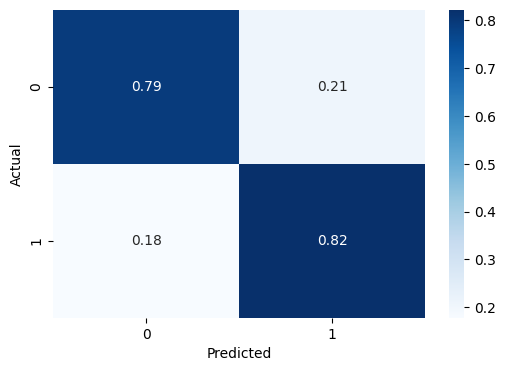

In [23]:
y_val_rf_ada_pca_pred = rf_ada_pca.predict(X_val_pca)
accuracy_pca = accuracy_score(y_val, y_val_rf_ada_pca_pred)

print(f'Accuracy: {accuracy_pca:.4f}')

print('Classification Report:')
print(classification_report(y_val, y_val_rf_ada_pca_pred))
rf_ada_pca_confmat = confusion_matrix(y_val, y_val_rf_ada_pca_pred, normalize='true')

plt.figure(figsize=(6,4))
sns.heatmap(rf_ada_pca_confmat,annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### *Hyper-parameters Tuning RF with PCA*

In [24]:
param_grid = {'criterion' : ['gini', 'entropy'], 
                'n_estimators': [25, 50, 100, 150], 
                'max_features': ['sqrt', 'log2', None], 
                'max_depth': [3, 6, 9], 
                'max_leaf_nodes': [3, 6, 9]}
rf_pca_grid = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', verbose=3)
rf_pca_grid.fit(X_train_pca,y_train.values.ravel())

# print best parameter after tuning 
print(rf_pca_grid.best_params_) 

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.783 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.782 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.789 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.791 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.802 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.783 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.785 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=3

In [25]:
rf_pca_grid.best_estimator_

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=25, random_state=42)

In [26]:
rf_pca_grid.best_score_

0.8027073348356076

#### **Tuned RF AdaBoost with PCA**

In [27]:
best_criterion = rf_pca_grid.best_params_.get('criterion')
best_max_features = rf_pca_grid.best_params_.get('max_features')
best_n = rf_pca_grid.best_params_.get('n_estimators')
best_max_depth = rf_pca_grid.best_params_.get('max_depth')
best_max_leaf_nodes = rf_pca_grid.best_params_.get('max_leaf_nodes')

# Use Hyper-parameter tuned RF as base estimator
rf_pca_tune = RandomForestClassifier(n_estimators=best_n, 
                                 max_leaf_nodes=best_max_leaf_nodes, 
                                 max_depth=best_max_depth,
                                 criterion=best_criterion,
                                 max_features=best_max_features,
                                 random_state=42)

rf_ada_pca_tune = AdaBoostClassifier(estimator=rf_pca_tune, random_state=42)

# Measure the training time of the model
t0 = time.time()

rf_ada_pca_tune.fit(X_train_pca, y_train.values.ravel())

print(f'Training time: {time.time()-t0:.2f} s')

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training time: 60.11 s


Accuracy: 0.8135
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       524
           1       0.79      0.85      0.82       511

    accuracy                           0.81      1035
   macro avg       0.81      0.81      0.81      1035
weighted avg       0.82      0.81      0.81      1035



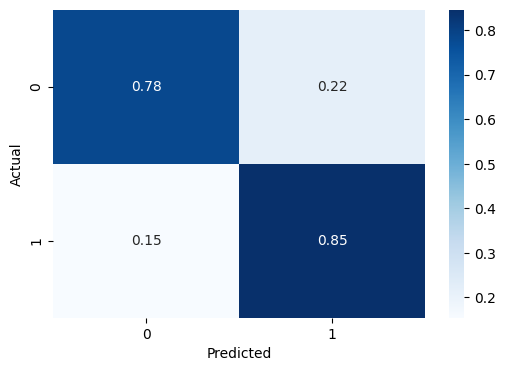

In [28]:
y_val_rf_ada_tune_pca_pred = rf_ada_pca_tune.predict(X_val_pca)
accuracy_tune_pca = accuracy_score(y_val, y_val_rf_ada_tune_pca_pred)

print(f'Accuracy: {accuracy_tune_pca:.4f}')

print('Classification Report:')
print(classification_report(y_val, y_val_rf_ada_tune_pca_pred))
rf_ada_tune_pca_confmat = confusion_matrix(y_val, y_val_rf_ada_tune_pca_pred, normalize='true')

plt.figure(figsize=(6,4))
sns.heatmap(rf_ada_tune_pca_confmat,annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
import joblib

# Save model
joblib.dump(rf_ada, './models/rf_ada.sav')
joblib.dump(rf_ada_tune, './models/rf_ada_tune.sav')
joblib.dump(rf_ada_pca, './models/rf_ada_pca.sav')
joblib.dump(rf_ada_pca_tune, './models/rf_ada_pca_tune.sav')

['/kaggle/working/rf_ada_pca_tune.sav']